**Step 1: Import Libraries**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set(style='whitegrid')

**Step 2: Load the datasets**

In [6]:
fear_greed_path = '/content/fear_greed_index.csv'
historical_data_path = '/content/historical_data.csv'
fear_greed_df = pd.read_csv(fear_greed_path)
historical_df = pd.read_csv(historical_data_path)

**Step 3: Inspect the datasets**

In [7]:
print("Fear & Greed Index Data Info:")
print(fear_greed_df.info())
print(fear_greed_df.head())
print("\nHistorical Trader Data Info:")
print(historical_df.info())
print(historical_df.head())

Fear & Greed Index Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
None
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05

Historical Trader Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account       

**Step 4: Data Cleaning and Preprocessing**

In [8]:
# Fear & Greed Index: Convert 'date' to datetime
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'], errors='coerce')
print("\nMissing values in Fear & Greed Index dataset:")
print(fear_greed_df.isnull().sum())

# Historical Trader Data: Convert 'Timestamp IST' to datetime
historical_df['Timestamp IST'] = pd.to_datetime(historical_df['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')

# Convert numeric columns to appropriate types
numeric_cols = ['Execution Price', 'Size Tokens', 'Size USD', 'Closed PnL', 'Fee']
for col in numeric_cols:
    historical_df[col] = pd.to_numeric(historical_df[col], errors='coerce')
print("\nMissing values in Historical Trader dataset:")
print(historical_df.isnull().sum())

# Extract date from 'Timestamp IST' for merging later
historical_df['date'] = historical_df['Timestamp IST'].dt.date
historical_df['date'] = pd.to_datetime(historical_df['date'])


Missing values in Fear & Greed Index dataset:
timestamp         0
value             0
classification    0
date              0
dtype: int64

Missing values in Historical Trader dataset:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


**Step 5: Create outputs directory in Colab**

In [9]:
output_dir = 'outputs'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

**Step 6: Basic EDA Visualizations**

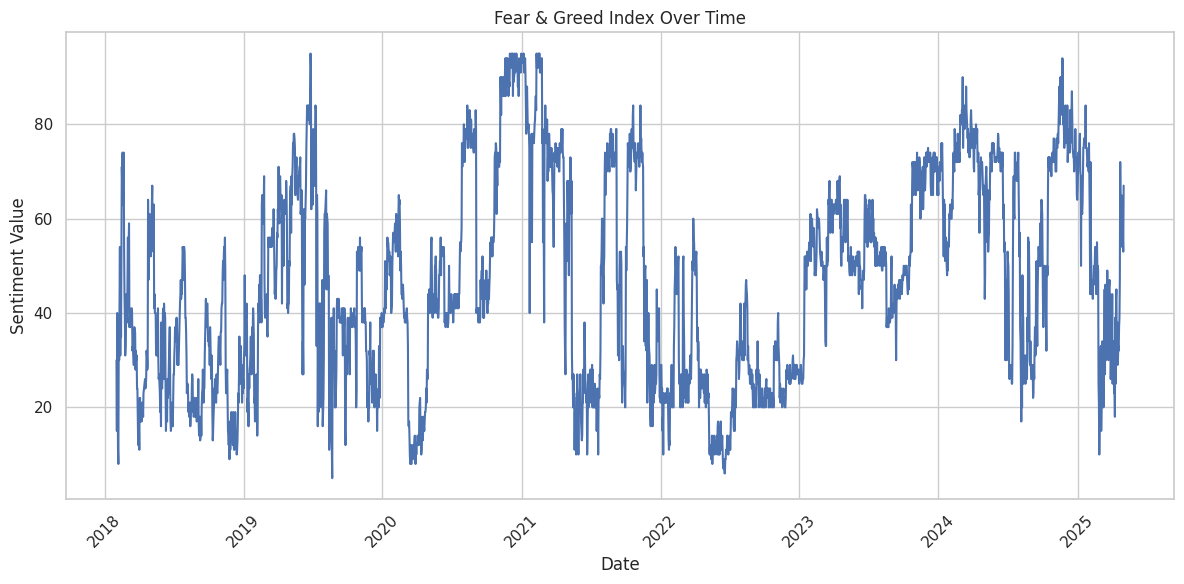

In [10]:
# Plot Fear & Greed Index value over time
plt.figure(figsize=(12,6))
sns.lineplot(data=fear_greed_df, x='date', y='value')
plt.title('Fear & Greed Index Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'{output_dir}/fear_greed_index_over_time.png')
plt.show()

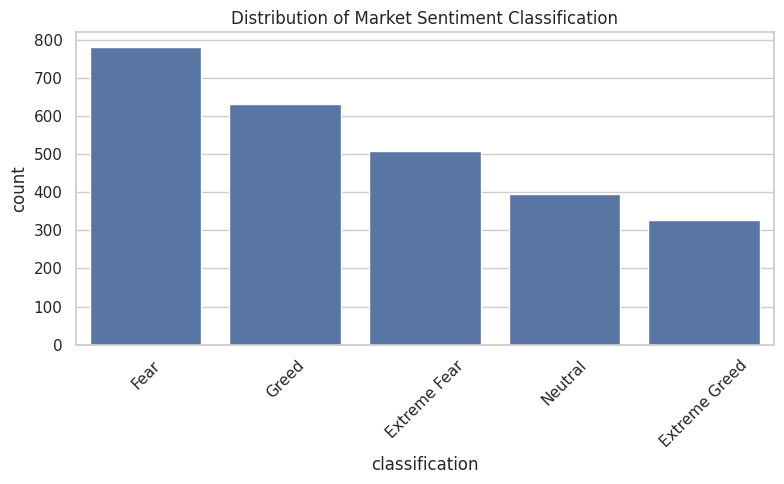

In [11]:
# Distribution of Classification
plt.figure(figsize=(8,5))
sns.countplot(data=fear_greed_df, x='classification', order=fear_greed_df['classification'].value_counts().index)
plt.title('Distribution of Market Sentiment Classification')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'{output_dir}/sentiment_classification_distribution.png')
plt.show()

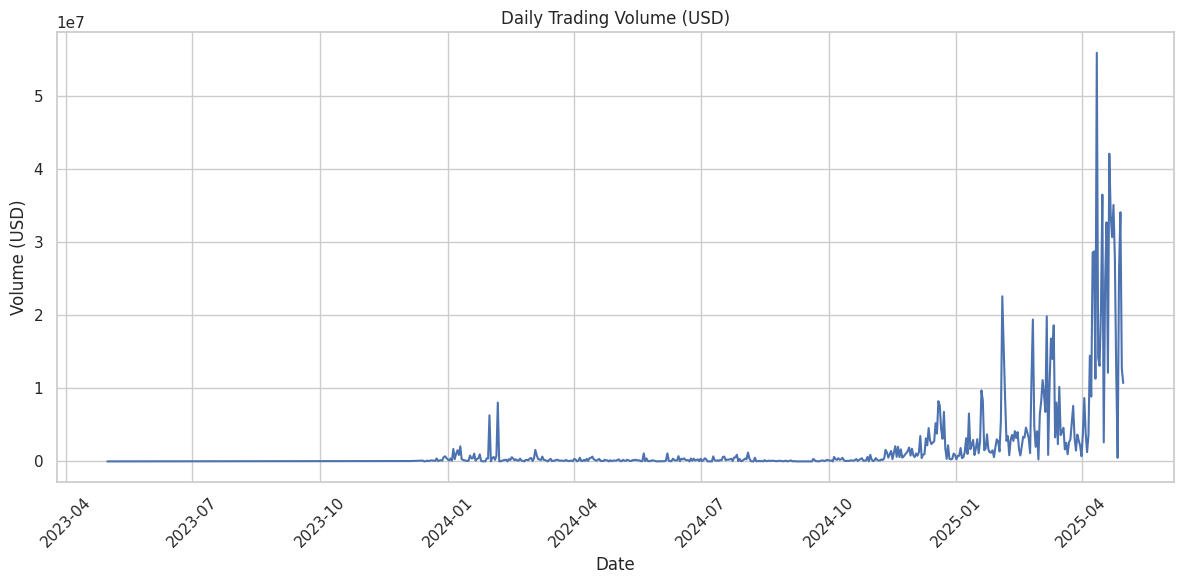

In [12]:
# Daily trading volume (sum of Size USD)
daily_volume = historical_df.groupby('date')['Size USD'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=daily_volume, x='date', y='Size USD')
plt.title('Daily Trading Volume (USD)')
plt.xlabel('Date')
plt.ylabel('Volume (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'{output_dir}/daily_trading_volume.png')
plt.show()

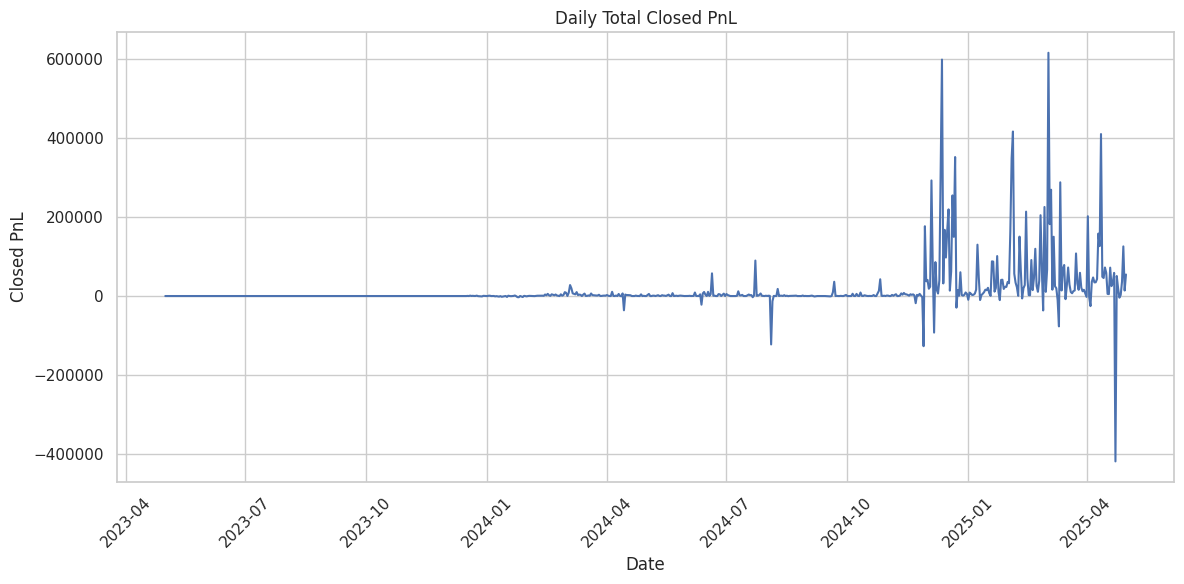

In [13]:
# Daily total Closed PnL
daily_pnl = historical_df.groupby('date')['Closed PnL'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=daily_pnl, x='date', y='Closed PnL')
plt.title('Daily Total Closed PnL')
plt.xlabel('Date')
plt.ylabel('Closed PnL')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'{output_dir}/daily_closed_pnl.png')
plt.show()

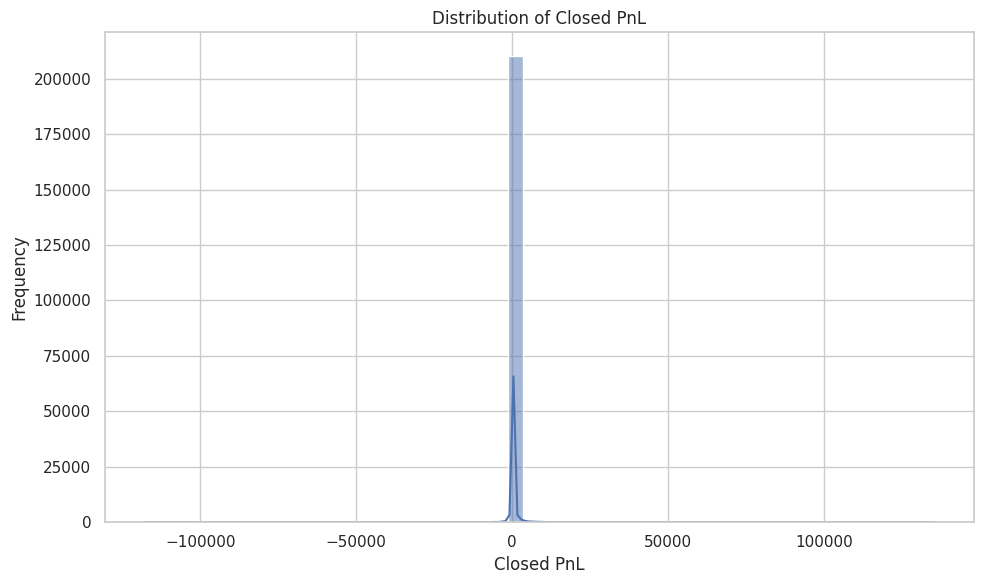

In [14]:
# Distribution of Closed PnL
plt.figure(figsize=(10,6))
sns.histplot(historical_df['Closed PnL'].dropna(), bins=50, kde=True)
plt.title('Distribution of Closed PnL')
plt.xlabel('Closed PnL')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig(f'{output_dir}/closed_pnl_distribution.png')
plt.show()

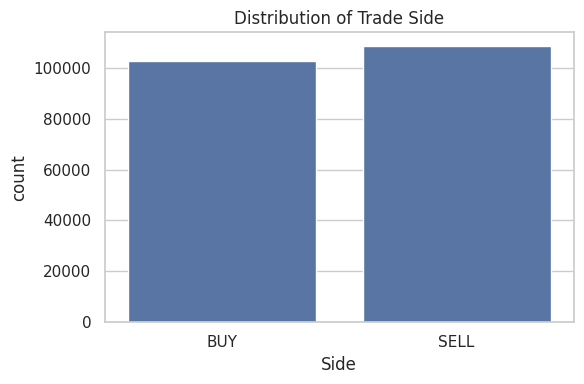

In [15]:
# Distribution of Side (BUY/SELL)
plt.figure(figsize=(6,4))
sns.countplot(data=historical_df, x='Side')
plt.title('Distribution of Trade Side')
plt.tight_layout()
plt.savefig(f'{output_dir}/trade_side_distribution.png')
plt.show()

In [16]:
!zip -r outputs.zip outputs

  adding: outputs/ (stored 0%)
  adding: outputs/closed_pnl_distribution.png (deflated 25%)
  adding: outputs/trade_side_distribution.png (deflated 20%)
  adding: outputs/sentiment_classification_distribution.png (deflated 18%)
  adding: outputs/fear_greed_index_over_time.png (deflated 3%)
  adding: outputs/daily_closed_pnl.png (deflated 11%)
  adding: outputs/daily_trading_volume.png (deflated 10%)
